# Agregación de datos por categoría

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np

In [3]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [4]:
n = 500

gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [5]:
gender_data[1:10]

['Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male']

In [29]:
income_data[1:10]

['Rich',
 'Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Rich',
 'Rich',
 'Rich',
 'Rich']

In [30]:
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [31]:
df = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    }
)

In [32]:
df.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,188.113244,73.273253,29.873605,18053.804626
1,Female,Rich,191.912569,69.362672,30.668158,17029.338446
2,Male,Middle Class,133.959460,74.807304,49.560084,15861.970301
3,Female,Rich,131.047175,68.530469,38.689919,16744.246606
4,Female,Rich,180.404420,51.837040,39.913172,15503.809751


# Agrupación de datos 

In [35]:
grouped_gender = df.groupby("Gender")

In [36]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   3,   4,   6,   7,   8,  14,  16,  17,
             ...
             479, 484, 486, 487, 489, 490, 492, 493, 494, 495],
            dtype='int64', length=266),
 'Male': Int64Index([  2,   5,   9,  10,  11,  12,  13,  15,  18,  19,
             ...
             481, 482, 483, 485, 488, 491, 496, 497, 498, 499],
            dtype='int64', length=234)}

In [39]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Poor  188.113244   73.273253  29.873605  18053.804626
1    Female            Rich  191.912569   69.362672  30.668158  17029.338446
3    Female            Rich  131.047175   68.530469  38.689919  16744.246606
4    Female            Rich  180.404420   51.837040  39.913172  15503.809751
6    Female            Rich  185.411888   99.662513  39.103836  18347.249426
7    Female            Rich  207.296774   97.660455  23.947285  24722.886108
8    Female            Rich  144.583442   56.392490  35.163311  14636.554291
14   Female            Rich  146.949272   87.536549  43.701470  16278.872927
16   Female            Poor  148.049219  126.542937  26.858645  23255.814584
17   Female    Middle Class  196.975492   12.616593  26.011617  16875.368573
20   Female    Middle Class  156.033287   55.826832  28.419649  14495.277166
21   Female            Poor  191.730936   86.286535  25.217881  23272

In [44]:
grouped_gender.get_group("Female").head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,188.113244,73.273253,29.873605,18053.804626
1,Female,Rich,191.912569,69.362672,30.668158,17029.338446
3,Female,Rich,131.047175,68.530469,38.689919,16744.246606
4,Female,Rich,180.404420,51.837040,39.913172,15503.809751
6,Female,Rich,185.411888,99.662513,39.103836,18347.249426


In [45]:
double_group = df.groupby(["Gender", "Economic Status"])

In [47]:
len(double_group)

6

In [48]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
17   Female    Middle Class  196.975492   12.616593  26.011617  16875.368573
20   Female    Middle Class  156.033287   55.826832  28.419649  14495.277166
31   Female    Middle Class  167.992434   62.866953  16.760826  18143.027926
40   Female    Middle Class  185.683428  100.070262  27.867476   9492.970088
42   Female    Middle Class  186.711162   79.234003  23.867661  20476.139904
44   Female    Middle Class  109.314087  111.058555  41.234047  17420.882244
46   Female    Middle Class  145.062741   89.537433  35.163242  24146.926251
48   Female    Middle Class  141.131972   80.102369  48.950992  15686.283069
51   Female    Middle Class  137.399486   84.309202  30.437341  19580.625663
58   Female    Middle Class  155.531234   42.245128  22.066910  23682.471942
61   Female    Middle Class  179.646125   84.130885  21.780306  16439.890389
64   Female    Middle Class  155.416657   60.2127

# Operaciones sobre datos agrupados

In [50]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15027.372626  6153.593211  2709.788597  1.657846e+06
       Poor             13988.901592  5504.113768  2566.554894  1.547852e+06
       Rich             13936.597982  5340.986105  2522.864284  1.513400e+06
Male   Middle Class     12747.255317  5486.726316  2647.234725  1.495658e+06
       Poor             13079.804792  5301.580151  2478.134158  1.460861e+06
       Rich             10812.889835  4566.192084  2085.986499  1.270879e+06

In [51]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     163.341007  66.886883  29.454224  18020.061060
       Poor             158.964791  62.546747  29.165397  17589.224643
       Rich             162.053465  62.104490  29.335631  17597.677261
Male   Middle Class     151.753039  65.318170  31.514699  17805.455313
       Poor             159.509815  64.653416  30.221148  17815.381051
       Rich             159.013086  67.149884  30.676272  18689.394199

In [52]:
double_group.size()

Gender  Economic Status
Female  Middle Class       92
        Poor               88
        Rich               86
Male    Middle Class       84
        Poor               82
        Rich               68
dtype: int64

In [54]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      92.0  163.341007  28.059054  59.040938  145.521546   
       Poor              88.0  158.964791  29.841371  60.246636  141.608234   
       Rich              86.0  162.053465  29.999286  96.831761  140.029029   
Male   Middle Class      84.0  151.753039  26.727764  98.033693  133.696147   
       Poor              82.0  159.509815  29.048330  91.912656  136.221667   
       Rich              68.0  159.013086  28.356974  98.227147  139.541659   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     162.267266  183.651113  227.263086   92.0  66.886883   
       Poor             158.674872  181.196716  219.026567   88.0  62.546747   
       Rich             160.296870  183.636304  259.690131   86.0  62.104490   
Male   Middle Class     149.223310  169.653158  216.480221   84.0  65.318170   
       Poor             160.914058  178.568364  226.588188   82.0  64.653416   
       Rich             156.060727  178.429340  227.619403   68.0  67.149884   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  37.464212  72.084108   92.0  18020.061060   
       Poor             ...  35.876194  60.189678   88.0  17589.224643   
       Rich             ...  35.090549  58.157317   86.0  17597.677261   
Male   Middle Class     ...  40.485687  61.306644   84.0  17805.455313   
       Poor             ...  37.525611  52.830985   82.0  17815.381051   
       Rich             ...  38.285862  52.095488   68.0  18689.394199   

                                                                              \
                                std          min           25%           50%   
Gender Economic Status                                                         
Female Middle Class     3516.308329  9492.970088  15619.091088  17625.653374   
       Poor             3731.522602  8519.968681  15560.847329  17022.914265   
       Rich             3565.100317  9557.123744  15494.639227  17655.351277   
Male   Middle Class     3126.096067  9762.255902  15839.423208  18168.740647   
       Poor             3362.122811  8722.718918  15882.494327  18005.290341   
       Rich             3670.918244  9579.606415  16663.929940  19147.304672   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20808.755147  25941.341314  
       Poor             19577.147244  28018.570130  
       Rich             19822.423753  27479.299992  
Male   Middle Class     20149.935770  24351.211394  
       Poor             19881.936171  25961.527640  
       Rich             20522.050857  26654.570930  

[6 rows x 32 columns]

In [55]:
grouped_income = double_group["Income"]

In [56]:
grouped_income.describe()

count          mean          std          min  \
Gender Economic Status                                                  
Female Middle Class      92.0  18020.061060  3516.308329  9492.970088   
       Poor              88.0  17589.224643  3731.522602  8519.968681   
       Rich              86.0  17597.677261  3565.100317  9557.123744   
Male   Middle Class      84.0  17805.455313  3126.096067  9762.255902   
       Poor              82.0  17815.381051  3362.122811  8722.718918   
       Rich              68.0  18689.394199  3670.918244  9579.606415   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15619.091088  17625.653374  20808.755147  25941.341314  
       Poor             15560.847329  17022.914265  19577.147244  28018.570130  
       Rich             15494.639227  17655.351277  19822.423753  27479.299992  
Male   Middle Class     15839.423208  18168.740647  20149.935770  24351.211394  
       Poor             15882.494327  18005.290341  19881.936171  25961.527640  
       Rich             16663.929940  19147.304672  20522.050857  26654.570930

In [58]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.657846e+06  29.454224  28.059054
       Poor             1.547852e+06  29.165397  29.841371
       Rich             1.513400e+06  29.335631  29.999286
Male   Middle Class     1.495658e+06  31.514699  26.727764
       Poor             1.460861e+06  30.221148  29.048330
       Rich             1.270879e+06  30.676272  28.356974

In [61]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.454224  5.853228
       Poor             29.165397  5.357521
       Rich             29.335631  5.433594
Male   Middle Class     31.514699  5.711831
       Poor             30.221148  5.524979
       Rich             30.676272  5.649240

In [65]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     15027.372626  163.341007  28.059054  6153.593211   
       Poor             13988.901592  158.964791  29.841371  5504.113768   
       Rich             13936.597982  162.053465  29.999286  5340.986105   
Male   Middle Class     12747.255317  151.753039  26.727764  5486.726316   
       Poor             13079.804792  159.509815  29.048330  5301.580151   
       Rich             10812.889835  159.013086  28.356974  4566.192084   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     66.886883  23.925599  2709.788597  29.454224   
       Poor             62.546747  23.918215  2566.554894  29.165397   
       Rich             62.104490  24.414594  2522.864284  29.335631   
Male   Middle Class     65.318170  22.437078  2647.234725  31.514699   
       Poor             64.653416  23.986301  2478.134158  30.221148   
       Rich             67.149884  25.974355  2085.986499  30.676272   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.643943  1.657846e+06  18020.061060  3516.308329  
       Poor             10.761515  1.547852e+06  17589.224643  3731.522602  
       Rich             11.972518  1.513400e+06  17597.677261  3565.100317  
Male   Middle Class     12.319843  1.495658e+06  17805.455313  3126.096067  
       Poor             10.246099  1.460861e+06  17815.381051  3362.122811  
       Rich             11.091215  1.270879e+06  18689.394199  3670.918244

In [66]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.853228  2.810939  2.543436  5.152791
       Poor             5.357521  2.630012  2.725688  4.740698
       Rich             5.433594  2.558664  2.464618  4.965047
Male   Middle Class     5.711831  2.928656  2.573408  5.729957
       Poor             5.524979  2.712018  2.967678  5.331458
       Rich             5.649240  2.604459  2.786381  5.129057

# Filtrado de datos

In [72]:
double_group["Age"].filter(lambda x: x.sum() > 2400)

0      29.873605
1      30.668158
2      49.560084
3      38.689919
4      39.913172
5      32.097121
6      39.103836
7      23.947285
8      35.163311
10     45.261817
11     32.598556
12     41.254196
14     43.701470
15     40.902719
16     26.858645
17     26.011617
18     26.606153
19     18.629997
20     28.419649
21     25.217881
24     45.859523
25     22.542996
26     51.767614
28     38.270706
30     26.295053
31     16.760826
32     25.172241
33     31.314208
34     26.717932
36     21.578111
         ...    
463    28.178099
464    38.340922
465    15.866401
468     7.845675
469    42.802465
470    41.047307
471    32.580917
472    23.390831
474    48.657241
475    11.066158
476    22.670394
477    24.249175
478    61.306644
479    29.570915
480    34.290953
481    52.830985
483    17.220589
484    34.509210
485    27.175171
486    28.311752
487    43.709621
489    25.167126
490    56.931596
491    31.046989
492    35.889572
493    34.301656
494    11.597844
495    40.6686

# Transformación de variables

In [78]:
zscore = lambda x: (x - x.mean())/x.std()

In [85]:
zgroup = double_group.transform(zscore)

In [86]:
import matplotlib.pyplot as plt

(array([  9.,  27.,  69., 137., 109.,  83.,  46.,  16.,   3.,   1.]),
 array([-2.65238014, -2.02103003, -1.38967991, -0.7583298 , -0.12697968,
         0.50437043,  1.13572054,  1.76707066,  2.39842077,  3.02977089,
         3.661121  ]),
 <a list of 10 Patch objects>)

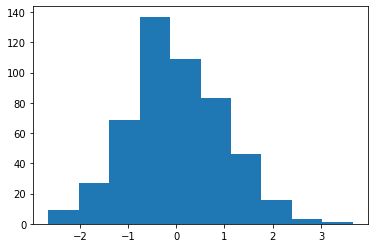

In [87]:
plt.hist(zgroup["Age"])

In [89]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [90]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,188.113244,73.273253,29.873605,18053.804626
1,191.912569,69.362672,30.668158,17029.338446
2,133.959460,74.807304,49.560084,15861.970301
3,131.047175,68.530469,38.689919,16744.246606
4,180.404420,51.837040,39.913172,15503.809751
5,146.794280,86.395382,32.097121,22212.324209
6,185.411888,99.662513,39.103836,18347.249426
7,207.296774,97.660455,23.947285,24722.886108
8,144.583442,56.392490,35.163311,14636.554291
9,142.510275,96.190882,21.848861,20282.255892


# Operaciones diversas muy útiles

In [92]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,188.113244,73.273253,29.873605,18053.804626
1,Female,Rich,191.912569,69.362672,30.668158,17029.338446
2,Male,Middle Class,133.959460,74.807304,49.560084,15861.970301
5,Male,Poor,146.794280,86.395382,32.097121,22212.324209
9,Male,Rich,142.510275,96.190882,21.848861,20282.255892
17,Female,Middle Class,196.975492,12.616593,26.011617,16875.368573


In [93]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
486,Female,Middle Class,151.695953,64.255414,28.311752,13967.182960
492,Female,Rich,239.386178,25.836453,35.889572,9557.123744
495,Female,Poor,124.080814,56.019556,40.668639,13806.160429
496,Male,Poor,145.232088,105.348627,10.172613,18093.366555
498,Male,Rich,98.227147,49.702890,38.717117,17076.219884
499,Male,Middle Class,149.345128,42.509165,32.023077,20424.114971


In [94]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     194.448243  39.876733  40.060881  21936.360260
       Poor             147.647335  84.032802  44.383876  20751.483544
       Rich             153.529077  65.460065  30.365287  21372.312525
Male   Middle Class     137.881515  23.635350  40.261854  20702.903760
       Poor             147.573500  72.591699  19.909282  17661.325263
       Rich             112.516877  92.177490  34.424098  22693.514989

In [95]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     188.408324  59.104739  20.978145  25941.341314
       Poor             158.409767  31.206089  32.580917  21665.978283
       Rich             164.190242  27.447507  29.570915  13282.993397
Male   Middle Class     139.331472  50.867469  31.046989  16594.172453

In [96]:
data_sorted = df.sort_values(["Age", "Income"])

In [98]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
165,Female,Rich,203.135080,57.097886,-1.615246,27479.299992
257,Male,Middle Class,215.938499,55.008232,-1.162209,18873.179970
151,Male,Middle Class,174.126693,120.731031,1.201549,19070.978416
241,Female,Poor,187.743832,39.192188,2.826231,16810.092550
314,Female,Rich,164.437706,24.428219,4.345111,18390.013684
182,Female,Rich,101.074965,63.926769,4.973432,20062.153565
293,Male,Poor,187.007229,38.330856,5.040368,15038.466333
365,Female,Poor,176.350144,102.000666,5.326678,11298.719645
164,Female,Middle Class,206.688655,76.452428,6.350790,15693.469342
93,Male,Middle Class,141.732173,43.427431,7.024297,19693.349140


In [99]:
age_grouped = data_sorted.groupby(["Gender"])

In [102]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
165,Female,Rich,203.135080,57.097886,-1.615246,27479.299992
257,Male,Middle Class,215.938499,55.008232,-1.162209,18873.179970


In [103]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
478,Male,Middle Class,191.271582,86.910119,61.306644,18446.660697
300,Female,Middle Class,172.192974,44.253136,72.084108,14738.882339


# Conjunto de entrenamiento y conjunto de testing

In [104]:
import pandas as pd

In [106]:
df = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [108]:
len(df)

3333

## Dividir utilizando la distribución normal

In [111]:
a = np.random.randn(len(df))

(array([  5.,  35., 158., 416., 742., 850., 693., 297., 114.,  23.]),
 array([-3.57370883, -2.90894532, -2.24418182, -1.57941831, -0.91465481,
        -0.2498913 ,  0.4148722 ,  1.07963571,  1.74439922,  2.40916272,
         3.07392623]),
 <a list of 10 Patch objects>)

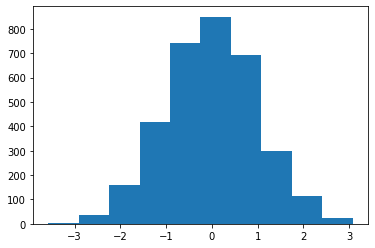

In [116]:
plt.hist(a)

In [135]:
check = (a<0.8)

In [136]:
hist_check = check.astype(np.float32)

(array([ 692.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2641.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

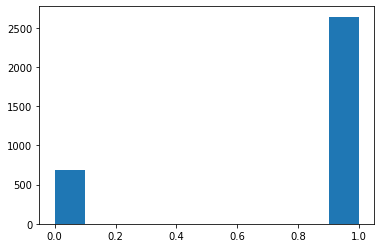

In [137]:
plt.hist(hist_check)

In [139]:
training = df[check]
testing = df[~check]

In [144]:
print("Training: " + str(len(training)))
print("Testing: " + str(len(testing)))
print("Total: " + str(len(training)+len(testing)))

Training: 2641
Testing: 692
Total: 3333


## Con libreria sklearn

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
train, test = train_test_split(df, test_size = 0.2)

In [161]:
print("Training: " + str(len(train)))
print("Testing: " + str(len(test)))
print("Total: " + str(len(train)+len(test)))

Training: 2666
Testing: 667
Total: 3333


## Usando una función de shuffle

In [154]:
import numpy as np

In [155]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [156]:
import sklearn

In [159]:
df = sklearn.utils.shuffle(df)

In [169]:
cut_id = int(0.75*len(df))
train_df = df[:cut_id]
test_df = df[cut_id:]

In [170]:
print("Training: " + str(len(train_df)))
print("Testing: " + str(len(test_df)))
print("Total: " + str(len(train_df)+len(test_df)))

Training: 2499
Testing: 834
Total: 3333
